In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os,sys



In [63]:
import warnings
warnings.filterwarnings('ignore')

In [102]:
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.eda import EDA
from scripts.plot import Plot

### CHECKING FOR MISSING VALUE, AND OTHER INFORMATIONS FOR STORE.CSV

In [90]:
# reading the csv file
missing_values = ["n/a", "na", "undefined"]
store = pd.read_csv("../data/store.csv", na_values=missing_values)
eda = EDA(store)
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [91]:
eda.has_missing_values()

True

In [92]:
eda.data_describe(size=True)

(1115, 10)

In [93]:
eda.data_describe(describe=True)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [86]:
# df.isnull().sum()

In [94]:
store.fillna("not available", inplace = True) 
# df.isnull().sum()

### CLEANING AND CHECKING THE TRAIN.CSV CONTENTS

In [98]:
train = pd.read_csv("../data/train.csv")
# train.isnull().sum()
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


### CLEANING AND CHECKING THE TEST.CSV CONTENTS

In [79]:
test = pd.read_csv("../data/test.csv")
test['Open'] = test['Open'].fillna(method='bfill')

### MERGING STORE.CSV AND TRAIN.CSV

In [96]:
train_store = pd.merge(train, store, how = 'left', on = "Store")

In [97]:
train_store

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,not available,not available,not available
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,not available,not available,not available
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,not available,not available,not available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,not available,not available,not available
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,not available,not available,0,not available,not available,not available
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,not available,not available,0,not available,not available,not available


In [105]:
plot = Plot()

## UNIVARIATE ANALYSIS

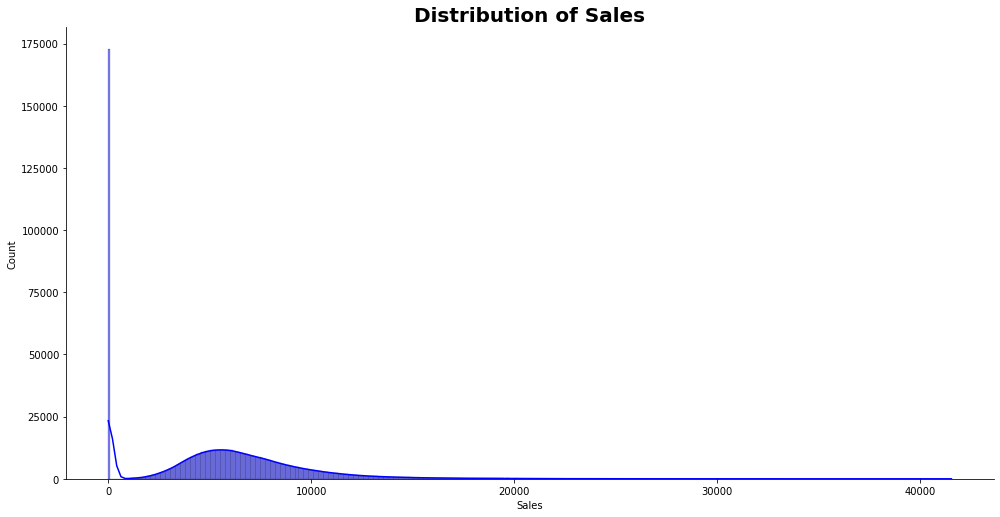

In [106]:
plot.plot_hist(train_store,"Sales", "blue")

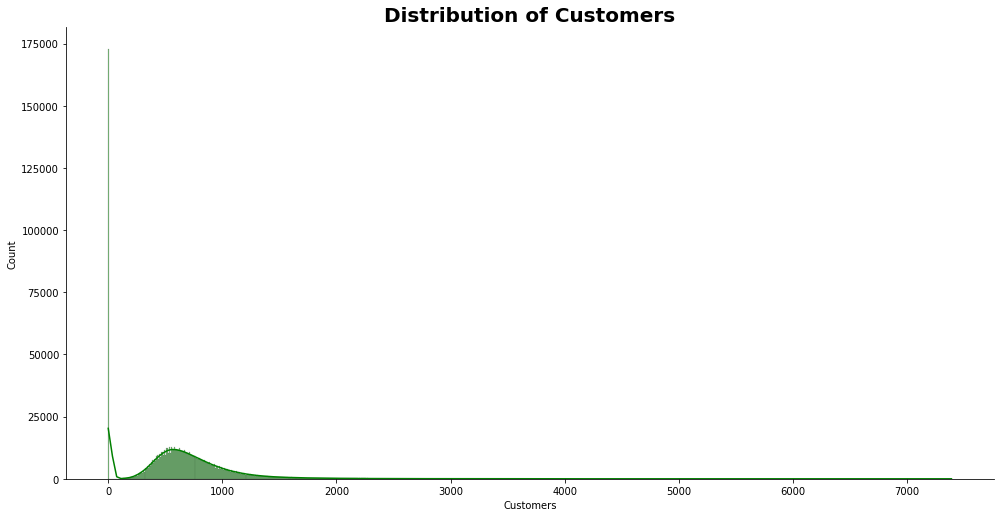

In [107]:
plot.plot_hist(train_store,"Customers", "green")

### MERGING STORE.CSV AND TEST.CSV

In [99]:
test_store = pd.merge(test, store, how = 'left', on = "Store")

In [100]:
test_store

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,not available,not available,not available
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,not available,not available,not available
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,not available,not available,not available
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,not available,not available,not available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,not available,not available,not available
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,not available,not available,0,not available,not available,not available
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,not available,not available,0,not available,not available,not available
